# **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Input, Conv1D, MaxPooling1D, Flatten

import warnings
warnings.filterwarnings('ignore')

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

# **Data Preparation & Basic EDA**

In [2]:
df = pd.read_csv('../input/heart-disease-uci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

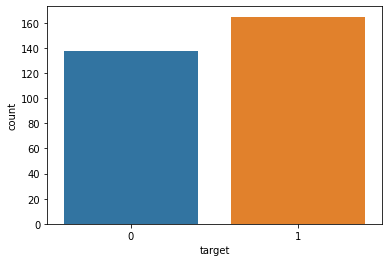

1    0.544554
0    0.455446
Name: target, dtype: float64

In [6]:
sns.countplot(df.target)
plt.show()
df.target.value_counts(normalize=True)

<AxesSubplot:xlabel='sex'>

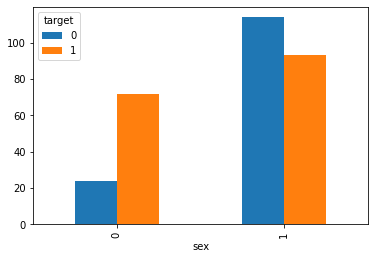

In [7]:
pd.crosstab(df.sex, df.target).plot(kind='bar')

<AxesSubplot:>

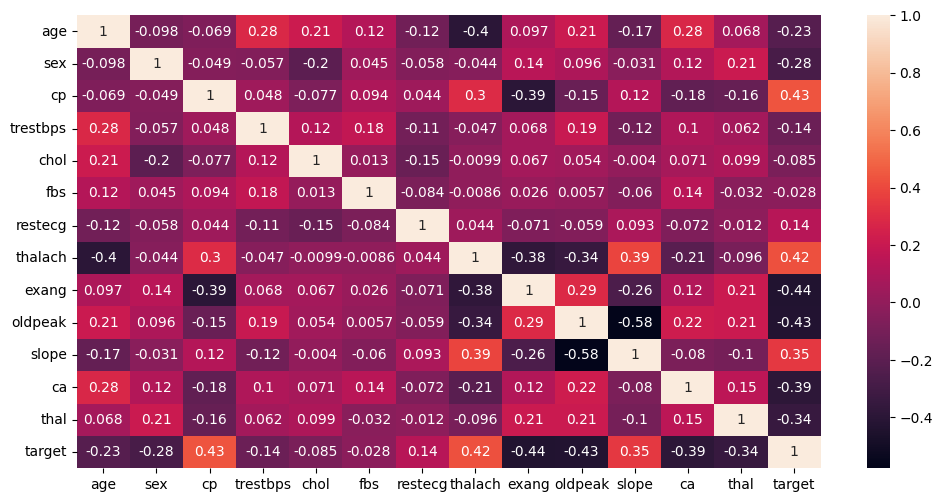

In [8]:
plt.figure(figsize = (12, 6), dpi = 100)
sns.heatmap(df.corr(), annot = True)

In [9]:
X = df.drop('target', axis = 1).values
y = df['target'].values

# 80-20 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Building**
**Here, We will build two architectures:**
* **DNN**
* **CNN (Conv1D)**
---
**Hyperparameter for both models:**  
* **Adam Optimizer**
* ***'binary_crossentropy'* loss function**
* **Final layer activated by Sigmoid**
* **Metrics: Accuracy -- Feel free to add *'AUC'* if you want**
* ***'binary_crossentropy'* loss function**
* **Early Stopping on *'val_loss'* with a patience of 3**

## **DNN**
* **Hidden Layers: Dense --> (8-16-8)**
* **Activated by the ReLU function**
* **Dropout rate of 20%**


In [10]:
X_train.shape

(242, 13)

In [11]:
i = Input(shape=(None, 242, 13))

x = Dense(16, activation='relu')(i)
# x = Dropout(0.2)(x)

x = Dense(32, activation='relu')(i)
# x = Dropout(0.2)(x)

x = Dense(16, activation='relu')(x)
# x = Dropout(0.2)(x)

y = Dense(1, activation='sigmoid')(x)

model_dnn = Model(inputs=i, outputs=y)


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

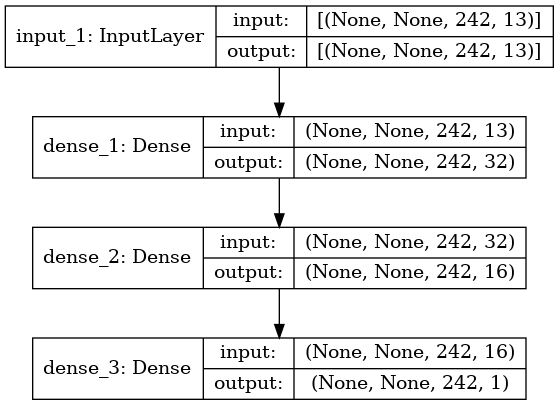

In [12]:
model_dnn.compile(optimizer='adam', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

tf.keras.utils.plot_model(model_dnn, show_shapes=True)

In [13]:
model_dnn.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, 242, 13)]   0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 242, 32)     448       
_________________________________________________________________
dense_2 (Dense)              (None, None, 242, 16)     528       
_________________________________________________________________
dense_3 (Dense)              (None, None, 242, 1)      17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

history_dnn = model_dnn.fit(x=X_train, y=y_train,
                            validation_data=(X_test, y_test),
                            epochs=50,
                            callbacks=[early_stopping])

2022-01-17 09:44:47.141586: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
8/8 [==============================] - 1s 39ms/step - loss: 0.6698 - accuracy: 0.5826 - val_loss: 0.6643 - val_accuracy: 0.5246
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6186 - accuracy: 0.6364 - val_loss: 0.6241 - val_accuracy: 0.5574
Epoch 3/50
8/8 [==============================] - 0s 8ms/step - loss: 0.5758 - accuracy: 0.6983 - val_loss: 0.5919 - val_accuracy: 0.6393
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5416 - accuracy: 0.7314 - val_loss: 0.5650 - val_accuracy: 0.7049
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5101 - accuracy: 0.7893 - val_loss: 0.5406 - val_accuracy: 0.7541
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4848 - accuracy: 0.7975 - val_loss: 0.5168 - val_accuracy: 0.7541
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.4615 - accuracy: 0.8140 - val_loss: 0.4967 - val_accuracy: 0.7541
Epoch 8/50
8/8 [=================

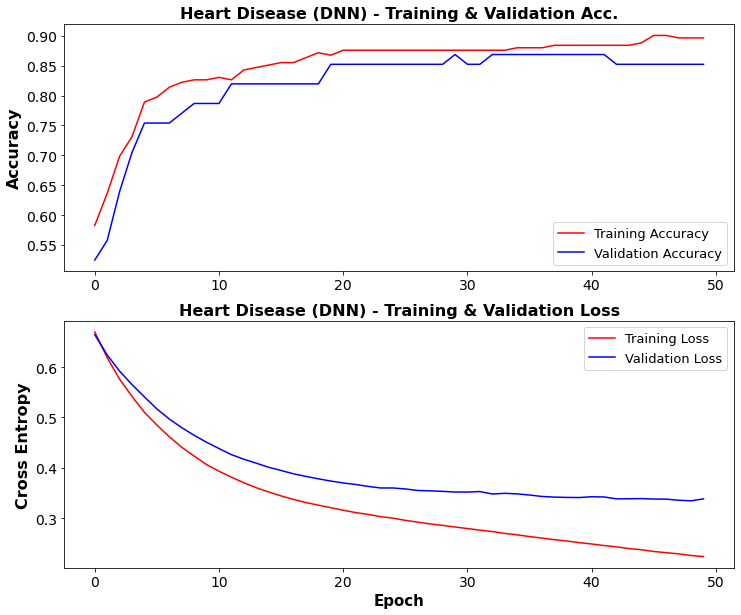

In [15]:
acc = history_dnn.history['accuracy']
val_acc = history_dnn.history['val_accuracy']

loss = history_dnn.history['loss']
val_loss = history_dnn.history['val_loss']

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Heart Disease (DNN) - Training & Validation Acc.', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Heart Disease (DNN) - Training & Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

## **DNN Classification Report & Conf. Matrix**

In [16]:
Y_pred = model_dnn.predict(X_test)
y_pred = np.round(Y_pred).astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



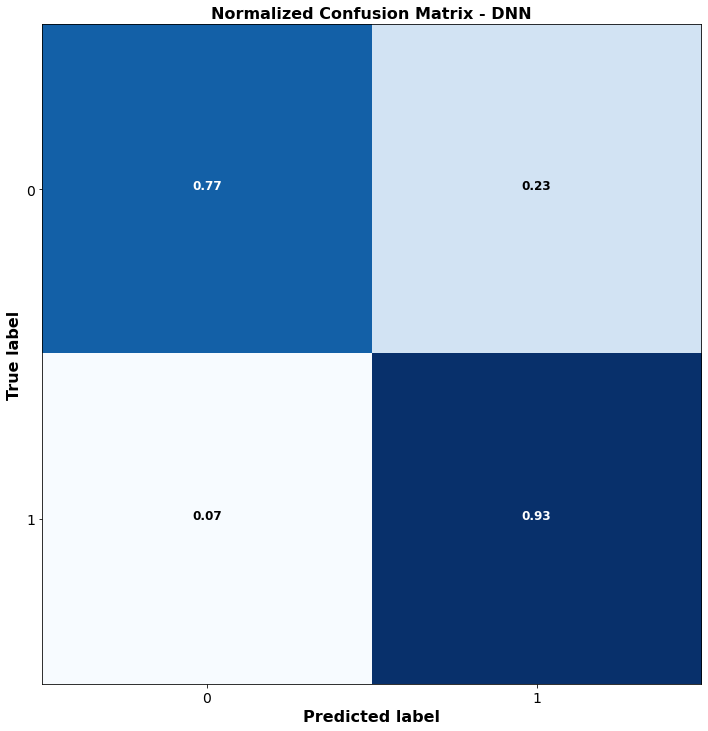

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True, title='Normalized Confusion Matrix - DNN')
plt.show()

## **CNN**
* **Conv1D --> 16-32-16**
* **Activated by the ReLU function**
* **MaxPooling1D, Pool size of 1**
* **A *Flatten* layer followd by a Dropout rate of 30%**

In [18]:
i_c = Input(shape=(X_train.shape[1],1))

x_c = Conv1D(16, 2, strides=1, activation='relu')(i_c)
x_c = MaxPooling1D(1)(x_c)

x_c = Conv1D(32, 2, strides=1, activation='relu')(i_c)
x_c = MaxPooling1D(1)(x_c)

x_c = Conv1D(16, 2, strides=1, activation='relu')(x_c)
x_c = MaxPooling1D(1)(x_c)

x_c = Flatten()(x_c)
# x_c = Dropout(0.3)(x_c)

y_c = Dense(1, activation='sigmoid')(x_c)

model_cnn = Model(inputs=i_c, outputs=y_c)

model_cnn.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 13, 1)]           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 12, 32)            96        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 16)            1040      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 11, 16)            0         
_________________________________________________________________
flatten (Flatten)            (None, 176)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 177 

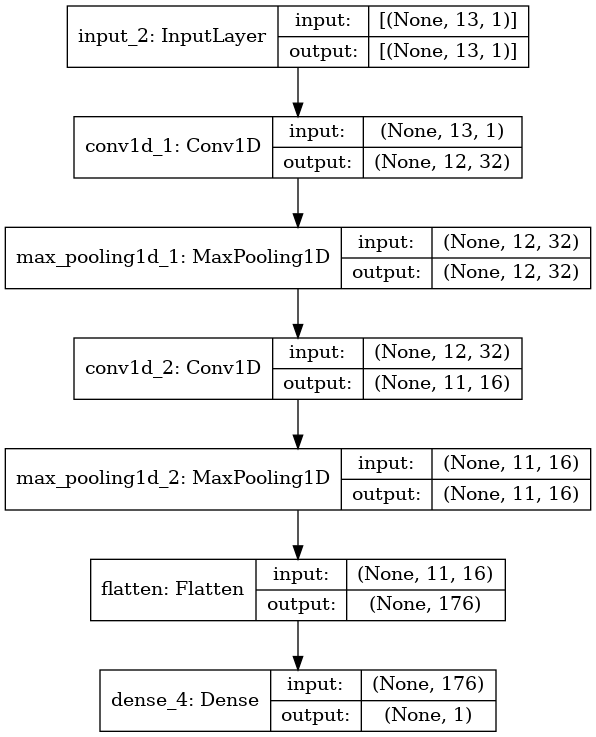

In [19]:
model_cnn.compile(optimizer='adam', 
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

tf.keras.utils.plot_model(model_cnn, show_shapes=True)

In [20]:
history_cnn = model_cnn.fit(x=X_train, y=y_train,
                            validation_data = (X_test, y_test),
                            epochs = 50,
                            callbacks = [early_stopping])

Epoch 1/50
8/8 [==============================] - 1s 37ms/step - loss: 0.6888 - accuracy: 0.5537 - val_loss: 0.6553 - val_accuracy: 0.7049
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6579 - accuracy: 0.6901 - val_loss: 0.6250 - val_accuracy: 0.8033
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6287 - accuracy: 0.7438 - val_loss: 0.5944 - val_accuracy: 0.8361
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5983 - accuracy: 0.7603 - val_loss: 0.5615 - val_accuracy: 0.8033
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5669 - accuracy: 0.7727 - val_loss: 0.5280 - val_accuracy: 0.8197
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5319 - accuracy: 0.7975 - val_loss: 0.4938 - val_accuracy: 0.8525
Epoch 7/50
8/8 [==============================] - 0s 9ms/step - loss: 0.4988 - accuracy: 0.8140 - val_loss: 0.4617 - val_accuracy: 0.8525
Epoch 8/50
8/8 [=================

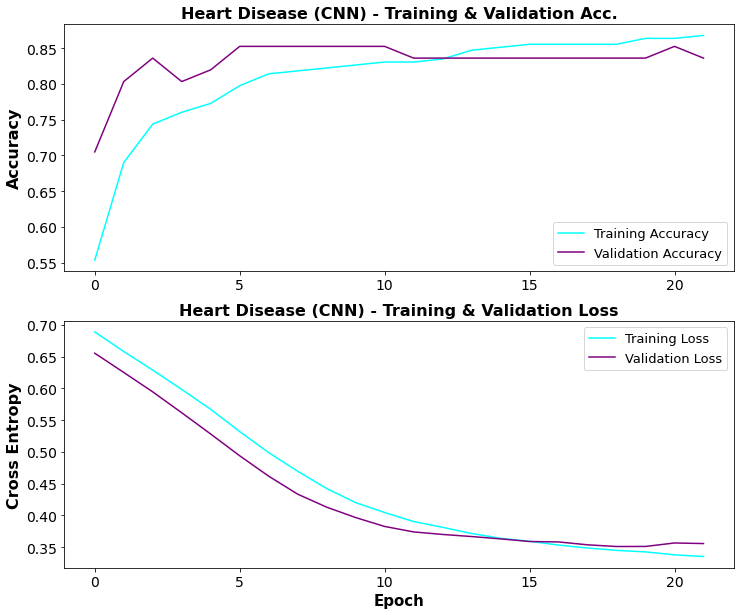

In [21]:
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)

plt.plot(acc, label='Training Accuracy', color='cyan')
plt.plot(val_acc, label='Validation Accuracy', color='purple')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('Heart Disease (CNN) - Training & Validation Acc.', fontsize=16, weight='bold')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='cyan')
plt.plot(val_loss, label='Validation Loss', color='purple')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('Heart Disease (CNN) - Training & Validation Loss', fontsize=16, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')
plt.show()

## **CNN Classification Report & Conf. Matrix**

In [22]:
from sklearn.metrics import classification_report

Y_pred_c = model_cnn.predict(X_test)
y_pred_c = np.round(Y_pred_c).astype(int)

print(classification_report(y_test, y_pred_c))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



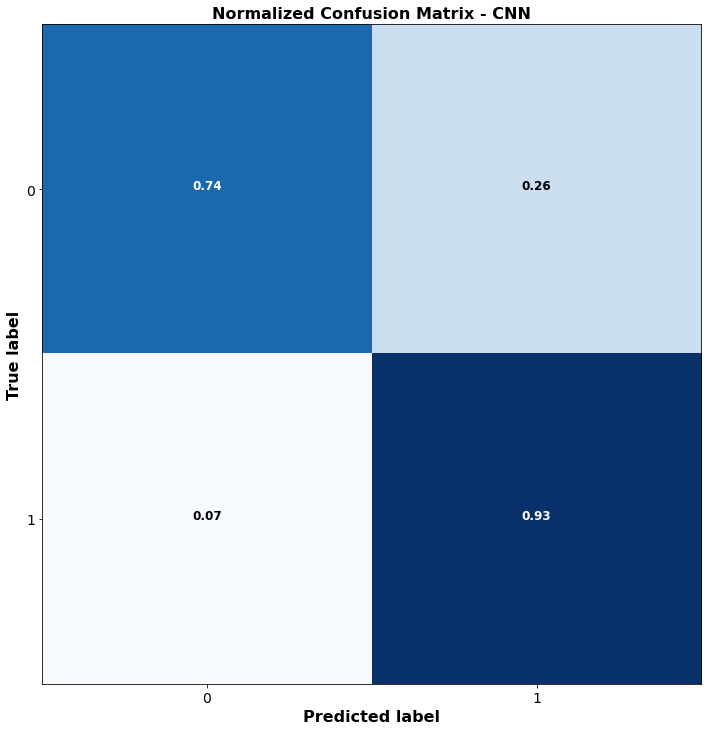

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, weight='bold', fontsize=16)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=14)
    plt.yticks(tick_marks, classes, fontsize=14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", fontsize=12, weight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16, weight='bold')
    plt.xlabel('Predicted label', fontsize=16, weight='bold')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_c)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['0', '1'], normalize=True, title='Normalized Confusion Matrix - CNN')
plt.show()

## **SVC**

In [24]:
model_svc = SVC(random_state=42) 
model_svc.fit(X_train, y_train)
score_svc = model_svc.score(X_test, y_test)
print("SVC Score: %.4f" % score_svc)

SVC Score: 0.8525


## **Logistic Regression**

In [25]:
model_lr = LogisticRegression(solver='liblinear', random_state=42) 
model_lr.fit(X_train, y_train)
score_lr = model_lr.score(X_test, y_test)
print("LR Score: %.4f" % score_lr)

LR Score: 0.8361


## **Decision Tree**

In [26]:
model_dt = DecisionTreeClassifier(random_state=42) 
model_dt.fit(X_train, y_train)
score_dt = model_dt.score(X_test, y_test)
print("DT Score: %.4f" % score_dt)

DT Score: 0.8525


## **Random Forest**

In [27]:
model_rf = RandomForestClassifier(n_estimators=150, random_state=42) 
model_rf.fit(X_train, y_train)
score_rf = model_rf.score(X_test, y_test)
print("RF Score: %.4f" % score_rf)

RF Score: 0.8525


# **Conclusion**
### **Given the performances, we can conclude that ALL models perform the same.**
### **HOWEVER, I FEEL SOMETHING IS OFF AND I MIGHT EXPLORE A BIT MORE LATER**


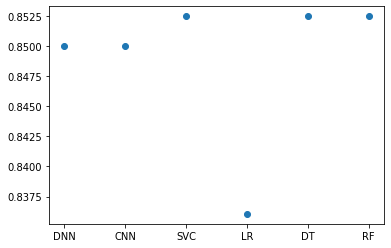

In [28]:
cnn_dnn = 0.85

x = np.array(['DNN', 'CNN', 'SVC', 'LR', 'DT', 'RF'])
y = np.array([cnn_dnn, cnn_dnn, score_svc, score_lr ,score_dt, score_rf])

plt.scatter(x, y)
plt.show()